# Importing Packages

In [ ]:
!pip install aisdc

In [1]:
import os
import sys
import pylab as plt
import numpy as np
import logging
import importlib
import argparse
import json
import pickle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score
from os.path import expanduser
from aisdc.safemodel.classifiers import SafeSVC
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_moons
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.impute import KNNImputer
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow_privacy as tf_privacy
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from aisdc.safemodel.classifiers import SafeKerasModel
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
import tensorflow_privacy as tf_privacy
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from aisdc.attacks.attack_report_formatter import (  # pylint: disable=import-error
    GenerateTextReport,
)
from aisdc.attacks.likelihood_attack import LIRAAttack  # pylint: disable=import-error
from aisdc.attacks.target import Target  # pylint: disable=import-error
from aisdc.attacks.worst_case_attack import (  # pylint: disable=import-error
    WorstCaseAttack,
)


from art.attacks.inference.membership_inference import MembershipInferenceBlackBoxRuleBased
from art.estimators.classification.scikitlearn import ScikitlearnSVC
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox
from art.metrics.privacy.worst_case_mia_score import get_roc_for_fpr
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from art import config
from art.estimators.classification import BlackBoxClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical
from art.utils import load_dataset, get_file, compute_accuracy
from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ZooAttack
from art.utils import load_mnist
from art.estimators.classification import XGBoostClassifier
import xgboost as xgb

INFO:art.config:set ART_DATA_PATH to C:\Users\alieyeh.moghaddam\.art\data


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data preperation

## Loading train data

In [3]:
train_data = pd.read_csv('C:/Users/alieyeh.moghaddam/Desktop/ADNI/synthetic_data89%.csv') #synthetic_data_bin43%.csv # synthetic_data.csv
# train_data = train_data.drop(columns=['Unnamed: 0', 'session_id', 'examination_date', 'earliest_time','rh.aparc.volume','lh.aparc.volume'])
# train_data = train_data.drop(columns=['participant_id', 'Measure:volume'])
# diagnosis_mapping = {'MCI': 2, 'CN': 0, 'AD': 1, 0.666667: 0}
# train_data['diagnosis'] = train_data['diagnosis'].map(diagnosis_mapping)
# train_data = train_data[(train_data['diagnosis'] == 0) | (train_data['diagnosis'] == 1)]

## Loading test data

In [14]:
test_data = pd.read_csv('C:/Users/alieyeh.moghaddam/Desktop/ADNI/ADNI_test_volumes.tsv') #ADNI_test_volumes.tsv #dementia_example_attribute.csv
# test_data = test_data.drop(columns=['Unnamed: 0'])
test_data = test_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'session_id','participant_id','rh.aparc.volume','lh.aparc.volume'])
diagnosis_mapping = {'MCI': 2, 'CN': 0, 'AD': 1}
test_data['diagnosis'] = test_data['diagnosis'].map(diagnosis_mapping)
test_data = test_data[(test_data['diagnosis'] == 0) | (test_data['diagnosis'] == 1)]

In [15]:
test_data

,diagnosis,age,edu,hippocampus_vol,brain_vol,entorhinal_vol,ventricles_vol,icv,mta,apoe4,...,rh_rostralmiddlefrontal_volume,rh_superiorfrontal_volume,rh_superiorparietal_volume,rh_superiortemporal_volume,rh_supramarginal_volume,rh_frontalpole_volume,rh_temporalpole_volume,rh_transversetemporal_volume,rh_insula_volume,eTIV
0,1,77.0,12.0,6558.0,1027600.0,2186.0,96934.0,1577760.0,20749.0,2.0,...,11670.0,17571.0,10350.0,7492.0,7000.0,1114.0,2109.0,597.0,6441.0,1.617070e+06
1,1,77.5,12.5,6298.0,1019190.0,2261.0,98523.0,1588400.0,20578.0,2.0,...,11311.0,16675.0,10596.0,8135.0,6639.0,823.0,1515.0,531.0,6200.0,1.622668e+06
2,1,78.0,13.0,6080.0,1021800.0,2377.0,101311.0,1580680.0,20927.0,2.0,...,12071.0,16941.0,10710.0,8236.0,6951.0,966.0,1782.0,533.0,6121.0,1.615075e+06
3,1,79.0,14.0,6047.0,997904.0,2485.0,106889.0,1583620.0,19859.0,2.0,...,11787.0,17102.0,9890.0,7463.0,6865.0,1058.0,2367.0,549.0,6565.0,1.608315e+06
4,1,81.5,18.0,4988.0,800230.0,2452.0,61993.0,1305270.0,13002.0,0.0,...,8694.0,14547.0,9902.0,7688.0,7545.0,919.0,2018.0,736.0,6231.0,1.315308e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0,81.0,16.5,7475.0,990479.0,3652.0,52292.0,1620690.0,19468.0,0.0,...,12242.0,16947.0,9348.0,9110.0,8106.0,1221.0,2535.0,507.0,5703.0,1.615824e+06
293,0,81.5,17.0,7913.0,1025370.0,3931.0,52849.0,1613320.0,19773.0,0.0,...,12481.0,17576.0,9314.0,9547.0,8461.0,1200.0,2405.0,595.0,5778.0,1.594623e+06
294,0,82.5,18.0,7677.0,1014580.0,3622.0,53553.0,1616630.0,19810.0,0.0,...,12284.0,17059.0,8719.0,9434.0,8327.0,1190.0,2064.0,637.0,6343.0,1.598043e+06
295,0,83.5,19.0,7671.0,1013480.0,3856.0,55104.0,1619890.0,20035.0,0.0,...,12659.0,17084.0,9283.0,9547.0,8314.0,1002.0,2059.0,608.0,5762.0,1.620273e+06


## Cleaning data

In [16]:
# Making sure both train and test having same features
common_columns = set(train_data.columns).intersection(set(test_data.columns))
train_data = train_data[common_columns]
test_data = test_data[common_columns]

In [17]:
# Imputing missing values using KNN
imputer = KNNImputer(n_neighbors=3)
train_data = train_data.replace([np.inf, -np.inf], np.nan)
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)
test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

## Split data

In [19]:
X_train = train_data.drop(columns=['diagnosis'])
X_test = test_data.drop(columns=['diagnosis'])
y_train = train_data['diagnosis']
y_test = test_data['diagnosis']
# X_train = train_data.drop(columns=['Dementia'])
# X_test = test_data.drop(columns=['Dementia'])
# y_train = train_data['Dementia']
# y_test = test_data['Dementia']

## Normalising data

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Set Seed

In [21]:
SEED = 12345

# Baseline Models

In [ ]:
# Membership Inference Attack /
# Database Reconstruction x
# Attribute inference -> bug -> moved to different dataset


### Adversarial Robustness Toolbox MI Attack

In [298]:
art_classifier = XGBoostClassifier(model=XGBmodel, nb_features=X_train.shape[1], nb_classes=10)

attack = MembershipInferenceBlackBoxRuleBased(art_classifier)

# infer attacked feature
inferred_train = attack.infer(X_train, y_train)
inferred_test = attack.infer(X_test, y_test)

# check accuracy
train_acc = np.sum(inferred_train) / len(inferred_train)
test_acc = 1 - (np.sum(inferred_test) / len(inferred_test))
acc = (train_acc * len(inferred_train) + test_acc * len(inferred_test)) / (len(inferred_train) + len(inferred_test))
print(f"Members Accuracy: {train_acc:.4f}")
print(f"Non Members Accuracy {test_acc:.4f}")
print(f"Attack Accuracy {acc:.4f}")

Members Accuracy: 0.9613
Non Members Accuracy 0.4946
Attack Accuracy 0.9098


In [299]:
attack_train_ratio = 0.5
attack_train_size = int(len(X_train) * attack_train_ratio)
attack_test_size = int(len(X_test) * attack_train_ratio)

bb_attack = MembershipInferenceBlackBox(art_classifier)

# train attack model
bb_attack.fit(X_train[:attack_train_size], y_train[:attack_train_size],
              X_test[:attack_test_size], y_test[:attack_test_size])

# get inferred values
inferred_train_bb = bb_attack.infer(X_train[attack_train_size:], y_train[attack_train_size:])
inferred_test_bb = bb_attack.infer(X_test[attack_test_size:], y_test[attack_test_size:])

# check accuracy
train_acc = np.sum(inferred_train_bb) / len(inferred_train_bb)
test_acc = 1 - (np.sum(inferred_test_bb) / len(inferred_test_bb))
acc = (train_acc * len(inferred_train_bb) + test_acc * len(inferred_test_bb)) / (len(inferred_train_bb) + len(inferred_test_bb))
print(f"Members Accuracy: {train_acc:.4f}")
print(f"Non Members Accuracy {test_acc:.4f}")
print(f"Attack Accuracy {acc:.4f}")

Members Accuracy: 0.9827
Non Members Accuracy 0.9462
Attack Accuracy 0.9786


### Database Reconstruction Attack

In [28]:
from art.attacks.inference.reconstruction import DatabaseReconstruction
# from art.estimators.estimator import DecisionTreeMixin
from art.estimators.estimator import DecisionTreeMixin
# from art.estimators.classification.classifier import ClassifierDecisionTree
from art.estimators.scikitlearn import ScikitlearnEstimator
from sklearn.ensemble import RandomForestClassifier

In [54]:
#

In [55]:
clf = RandomForestClassifier(n_estimators=100, max_depth= 5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [52]:
from art.estimators.classification.scikitlearn import ScikitlearnClassifier
art_classifier = ScikitlearnClassifier(model=clf)

In [53]:
dbrecon = DatabaseReconstruction(art_classifier)

AttributeError: 'ScikitlearnClassifier' object has no attribute 'get_trainable_attribute_names'

In [56]:
# art_classifier = SklearnClassifier(model=model)

In [27]:
art_classifier = XGBoostClassifier(model=XGBmodel, nb_features=X_train.shape[1], nb_classes=10)
dbrecon = DatabaseReconstruction(art_classifier)

EstimatorError: DatabaseReconstruction requires an estimator derived from <class 'art.estimators.estimator.BaseEstimator'> and <class 'art.estimators.classification.classifier.ClassifierMixin'> and <class 'art.estimators.scikitlearn.ScikitlearnEstimator'>, the provided classifier is an instance of <class 'art.estimators.classification.xgboost.XGBoostClassifier'> and is derived from (<class 'art.estimators.classification.classifier.ClassifierDecisionTree'>,).

In [ ]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
target_row = int(np.random.random() * x_train.shape[0])

x_public = np.delete(x_train, target_row, axis=0)
y_public = np.delete(y_train, target_row, axis=0)

In [ ]:
x, y = dbrecon.reconstruct(x_public, y_public)

In [ ]:
print("Inference RMSE: {}".format(
    np.sqrt(((x_train[target_row] - x) ** 2).sum() / x_train.shape[1])))

In [ ]:
np.argmax(y) == y_train[target_row]

### AI Attack

#### ART AI Attack

In [15]:
from art.attacks.inference.attribute_inference import AttributeInferenceBlackBox
from art.attacks.inference.attribute_inference import AttributeInferenceBaseline
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()

In [24]:
# attribute
attack_feature = 1
art_classifier = XGBoostClassifier(model=XGBmodel, nb_features=X_train.shape[1], nb_classes=10)
ai_attack = AttributeInferenceBlackBox(art_classifier, attack_feature=attack_feature)

attack_train_ratio = 0.5
attack_train_size = int(len(x_train) * attack_train_ratio)
attack_test_size = int(len(x_train) * attack_train_ratio)
attack_x_train = x_train[:attack_train_size]
attack_y_train = y_train[:attack_train_size]
attack_x_test = x_train[attack_train_size:]
attack_y_test = y_train[attack_train_size:]
values = [1.000000e+06, 8.000000e+03]

# # get original model's predictions
attack_x_test_predictions = np.array([np.argmax(arr) for arr in art_classifier.predict(attack_x_test)]).reshape(-1,1)
# only attacked feature
attack_x_test_feature = attack_x_test[:, attack_feature].copy().reshape(-1, 1)
# training data without attacked feature
attack_x_test = np.delete(attack_x_test, attack_feature, 1)

# train attack model
baseline_attack = AttributeInferenceBaseline(attack_feature=attack_feature)

# train attack model
baseline_attack.fit(attack_x_train)
# infer values
inferred_train_baseline = baseline_attack.infer(attack_x_test, values=values)
# check accuracy
baseline_train_acc = np.sum(inferred_train_baseline == np.around(attack_x_test_feature, decimals=8).reshape(1,-1)) / len(inferred_train_baseline)
print(baseline_train_acc)

IndexError: list index out of range

In [161]:
# we run the worst case metric on trainset to find an appropriate threshold
# Black Box
bb_members_test_prob = bb_attack.infer(X_train[attack_train_size:].astype(np.float32), y_train[attack_train_size:], probabilities=True)
bb_nonmembers_test_prob = bb_attack.infer(X_test[attack_test_size:].astype(np.float32), y_test[attack_test_size:], probabilities=True)

bb_mia_test_probs = np.concatenate((np.squeeze(bb_members_test_prob, axis=-1),
                               np.squeeze(bb_nonmembers_test_prob, axis=-1)))
                              
bb_mia_test_labels = np.concatenate((np.ones_like(y_train[:attack_train_size]), np.zeros_like(y_test[:attack_test_size])))
# We allow 1% FPR 
fpr, tpr, threshold = get_roc_for_fpr(attack_proba=bb_mia_test_probs, attack_true=bb_mia_test_labels, targeted_fpr=0.01)[0]
print(f'{tpr=}: {fpr=}: {threshold=}')

tpr=0.0: fpr=0.0: threshold=inf


In [29]:
X_test

,Sleep_Quality,Education_Level,Family_History,Cognitive_Test_Scores,APOE_ε4,Gender,Dominant_Hand,Diabetic,Age,Smoking_Status,Physical_Activity,Depression_Status,Nutrition_Diet
0,1.0,2.0,0.0,10.0,0.0,0.0,0.0,1.0,60.0,0.0,2.0,0.0,1.0
1,1.0,3.0,0.0,1.0,1.0,1.0,1.0,0.0,61.0,1.0,1.0,0.0,1.0
2,1.0,2.0,1.0,8.0,0.0,1.0,1.0,0.0,69.0,1.0,1.0,0.0,2.0
3,1.0,3.0,1.0,5.0,0.0,0.0,0.0,0.0,78.0,2.0,0.0,1.0,0.0
4,0.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,77.0,2.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,88.0,2.0,0.0,0.0,0.0
996,1.0,2.0,0.0,9.0,0.0,0.0,0.0,1.0,80.0,2.0,1.0,0.0,1.0
997,0.0,2.0,0.0,8.0,1.0,0.0,1.0,1.0,67.0,2.0,2.0,0.0,0.0
998,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,62.0,2.0,2.0,1.0,1.0


In [30]:
feature_vals = {
        "Sleep_Quality":         [0,1],                          # UNKNOWN
        "Education_Level":       [1, 2, 3],                      # UNKNOWN
        "Family_History":        [0,1],                          # UNKNOWN
        "Cognitive_Test_Scores": [0,1,2,3,4,5,6,7,8,9,10],       # UNKNOWN
        "APOE_ε4":               [0,1],                          # UNKNOWN
        "Gender":                [1],                            # known
        "Dominant_Hand":         [0],                            # known
        "Diabetic":              [1],                            # known
        "Age":                   [88],                           # known
        "Smoking_Status":        [0,1,2],                        # UNKNOWN
        "Physical_Activity":     [0,1,2],                        # UNKNOWN
        "Depression_Status":     [0,1],                          # UNKNOWN
        "Nutrition_Diet":        [0,1,2],                        # UNKNOWN
}
     

In [31]:
from itertools import product

all_combinations = product(*feature_vals.values())
print(all_combinations)
g = {}
for _, combination in enumerate(all_combinations):
    # Turn this particular combination into a dictionary
    g[_] = {n: v for n, v in zip(feature_vals.keys(), combination)}
attack_inputs = pd.DataFrame(g).T

probs = XGBmodel.predict_proba(attack_inputs)
     

In [32]:
# Add the prob dementia to dataframe
attack_values = attack_inputs.copy()
attack_values["confidence"] = probs[:, 1]
sorted_attack_values = attack_values.sort_values(by="confidence", ascending=False)[
    ["Education_Level", "Family_History", "Smoking_Status", "APOE_ε4", "Physical_Activity", "Depression_Status", "Cognitive_Test_Scores","Nutrition_Diet", "Sleep_Quality", "confidence"]
]

In [33]:
sorted_attack_values

,Education_Level,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Nutrition_Diet,Sleep_Quality,confidence
8614,1,1,1,1,1,1,2,1,1,0.828279
1246,1,1,0,1,0,1,0,1,0,0.828279
1263,1,1,1,1,0,1,0,0,0,0.828279
1259,1,1,0,1,2,1,0,2,0,0.828279
1258,1,1,0,1,2,1,0,1,0,0.828279
...,...,...,...,...,...,...,...,...,...,...
1015,1,0,2,0,1,0,9,1,0,0.260587
1016,1,0,2,0,1,0,9,2,0,0.260587
2208,1,1,2,0,2,0,9,0,0,0.260587
11598,2,1,2,0,1,0,8,0,1,0.260587


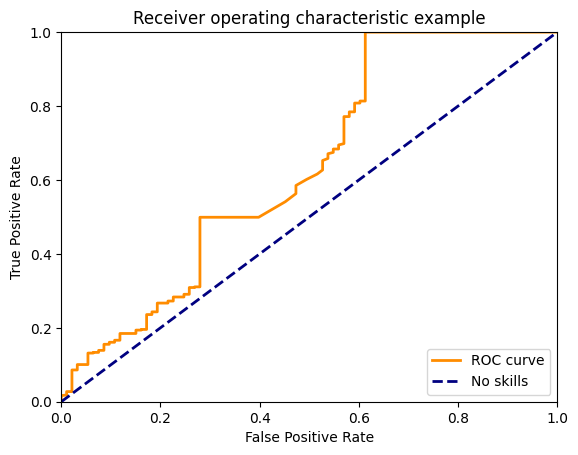

In [18]:
fpr, tpr, _ = roc_curve(y_score=bb_mia_test_probs, y_true=bb_mia_test_labels)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", linewidth =2, label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linewidth =2, linestyle="--", label='No skills')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [19]:
target_labels = np.concatenate((y_train[attack_train_size:], y_test[attack_test_size:]))
results = get_roc_for_fpr(attack_proba=bb_mia_test_probs, attack_true=bb_mia_test_labels, targeted_fpr=0.01, target_model_labels=target_labels)
for v, fpr, tpr, threshold in results:
    print(f'Class {v}: {tpr=:.4f}: {fpr=:.4f}: {threshold=:.4f}')

Class 0.0: tpr=0.0330: fpr=0.0000: threshold=0.8794
Class 1.0: tpr=0.0000: fpr=0.0000: threshold=inf


In [ ]:
# Neural network:
# aggregated bin F1 score with 100%
# noised F1 79%
# ordinary Syn data F1 69%
    
# Ordinary Syn data:
# Members Accuracy: 0.4927
# Non Members Accuracy 0.5258
# Attack Accuracy 0.4986
    
# Noised Syn data:
# Members Accuracy: 0.4627
# Non Members Accuracy 0.5258
# Attack Accuracy 0.4740
    
# Binned syn data
# Members Accuracy: 0.4767
# Non Members Accuracy 0.5258
# Attack Accuracy 0.4855

## XGBoost Model

### XGBoost Hyperparameter Optimisation

In [22]:
space={'max_depth': hp.quniform("max_depth", 1, 60, 1),
        'gamma': hp.quniform ('gamma', 1,10,1),
        'alpha' : hp.quniform('alpha', 1,10,1),
        'scale_pos_weight' : hp.uniform('scale_pos_weight', 0,20),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,1),
        'min_child_weight' : hp.uniform('min_child_weight', 0, 20),
        'n_estimators' : hp.quniform('n_estimators', 0, 5000,10),
        'learning_rate' : hp.uniform('learning_rate', 0.0001, 1)
        #,'k' : hp.quniform('k', 10, 280,1)
    }

def objective(space):
    clf=XGBClassifier(
                    n_estimators = int(space['n_estimators']),
                    max_depth = int(space['max_depth']),
                    gamma = int(space['gamma']),
                    alpha = int(space['alpha']),
                    min_child_weight=space['min_child_weight'],
                    colsample_bytree=space['colsample_bytree'],
                    scale_pos_weight=space['scale_pos_weight'],
                    learning_rate=space['learning_rate'],
                    eval_metric="error")

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation,
            #early_stopping_rounds=10,
            verbose=False)

    pred = clf.predict(X_test)
    #accuracy = accuracy_score(y_test, pred>0.5)
    f = f1_score(y_test, pred) #, average='macro'
    print("SCORE:", f)
    return {'loss': -f, 'status': STATUS_OK }


trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 10,
                        trials = trials)

  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.007001 seconds
INFO:hyperopt.tpe:TPE using 0 trials


SCORE:                                                                                                                 
0.7623318385650224                                                                                                     
 10%|████▊                                           | 1/10 [00:07<01:06,  7.40s/trial, best loss: -0.7623318385650224]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003999 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss -0.762332


SCORE:                                                                                                                 
0.7948717948717948                                                                                                     
 20%|█████████▌                                      | 2/10 [00:09<00:32,  4.08s/trial, best loss: -0.7948717948717948]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002999 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss -0.794872


SCORE:                                                                                                                 
0.769230769230769                                                                                                      
 30%|██████████████▍                                 | 3/10 [00:09<00:17,  2.51s/trial, best loss: -0.7948717948717948]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002999 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss -0.794872


SCORE:                                                                                                                 
0.7533632286995515                                                                                                     
 40%|███████████████████▏                            | 4/10 [00:23<00:42,  7.07s/trial, best loss: -0.7948717948717948]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.004998 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss -0.794872


SCORE:                                                                                                                 
0.7699115044247787                                                                                                     
 50%|████████████████████████                        | 5/10 [00:36<00:45,  9.13s/trial, best loss: -0.7948717948717948]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.005991 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss -0.794872


SCORE:                                                                                                                 
0.8017241379310345                                                                                                     
 60%|████████████████████████████▊                   | 6/10 [01:04<01:01, 15.45s/trial, best loss: -0.8017241379310345]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002999 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss -0.801724


SCORE:                                                                                                                 
0.8130841121495328                                                                                                     
 70%|█████████████████████████████████▌              | 7/10 [01:11<00:38, 12.86s/trial, best loss: -0.8130841121495328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002998 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss -0.813084


SCORE:                                                                                                                 
0.774468085106383                                                                                                      
 80%|██████████████████████████████████████▍         | 8/10 [01:21<00:23, 11.89s/trial, best loss: -0.8130841121495328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003001 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss -0.813084


SCORE:                                                                                                                 
0.7868852459016394                                                                                                     
 90%|███████████████████████████████████████████▏    | 9/10 [02:00<00:20, 20.29s/trial, best loss: -0.8130841121495328]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003000 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss -0.813084


SCORE:                                                                                                                 
0.7914893617021277                                                                                                     
100%|███████████████████████████████████████████████| 10/10 [02:14<00:00, 13.44s/trial, best loss: -0.8130841121495328]


In [113]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'alpha': 7.0, 'colsample_bytree': 0.9483878531510308, 'gamma': 1.0, 'learning_rate': 0.49240595664480996, 'max_depth': 39.0, 'min_child_weight': 3.4900669043344745, 'n_estimators': 2830.0, 'scale_pos_weight': 10.151045922001922}


### Final XGBoost Model & Evaluation

In [23]:
XGBmodel = XGBClassifier(alpha=int(best_hyperparams['alpha']),
                      colsample_bytree=best_hyperparams['colsample_bytree'],
                      gamma=int(best_hyperparams['gamma']),
                      learning_rate=best_hyperparams['learning_rate'],
                      max_depth=int(best_hyperparams['max_depth']),
                      min_child_weight=best_hyperparams['min_child_weight'],
                      n_estimators=int(best_hyperparams['n_estimators']),
                      scale_pos_weight=best_hyperparams['scale_pos_weight'],
                      eval_metric='error')#mlogloss error

XGBmodel.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test,y_test)])
predictions = XGBmodel.predict(X_test)

[0]	validation_0-error:0.42800	validation_1-error:0.40323
[1]	validation_0-error:0.36133	validation_1-error:0.40323
[2]	validation_0-error:0.31200	validation_1-error:0.31183
[3]	validation_0-error:0.28200	validation_1-error:0.34409
[4]	validation_0-error:0.24667	validation_1-error:0.31183
[5]	validation_0-error:0.21333	validation_1-error:0.28495
[6]	validation_0-error:0.21533	validation_1-error:0.28495
[7]	validation_0-error:0.18533	validation_1-error:0.27957
[8]	validation_0-error:0.17400	validation_1-error:0.26882
[9]	validation_0-error:0.16533	validation_1-error:0.25269
[10]	validation_0-error:0.15267	validation_1-error:0.25269
[11]	validation_0-error:0.14067	validation_1-error:0.20968
[12]	validation_0-error:0.13333	validation_1-error:0.23656
[13]	validation_0-error:0.12933	validation_1-error:0.24731
[14]	validation_0-error:0.11933	validation_1-error:0.21505
[15]	validation_0-error:0.11600	validation_1-error:0.25269
[16]	validation_0-error:0.11667	validation_1-error:0.25269
[17]	va

In [24]:
y_pred = XGBmodel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [25]:
f = f1_score(y_test, y_pred, average='weighted')
print("SCORE:", f)

SCORE: 0.7813844801552925


In [14]:
#old
f = f1_score(y_test, y_pred, average='weighted')
print("SCORE:", f)

SCORE: 0.902820051131768


In [285]:
confusion_matrix = confusion_matrix(y_test.to_numpy().astype(int), y_pred)
confusion_matrix

TypeError: 'numpy.ndarray' object is not callable

## Saving Models

In [118]:
# SVM_Baseline_Model = clf
XGB_Baseline_Model = XGBmodel
# NN_Baseline_Model = model

# SVM_Baseline_filename = os.path.join('/content/drive/MyDrive/Privacy-Project', "SVM_Baseline_model.pkl")
# print("Saving model to " + SVM_Baseline_filename)
# with open(SVM_Baseline_filename, "wb") as file:
#     pickle.dump(SVM_Baseline_Model, file)

XGB_Baseline_filename = os.path.join('./xg78', "XGB_Baseline_model.pkl")
print("Saving model to " + XGB_Baseline_filename)
with open(XGB_Baseline_filename, "wb") as file:
    pickle.dump(XGB_Baseline_Model, file)

# NN_Baseline_filename = os.path.join('/content/drive/MyDrive/Privacy-Project', "NN_Baseline_model.pkl")
# print("Saving model to " + NN_Baseline_filename)
# with open(NN_Baseline_filename, "wb") as file:
#     pickle.dump(NN_Baseline_Model, file)

Saving model to ./xg78\XGB_Baseline_model.pkl


In [119]:
np.savetxt(os.path.join('./xg78', "x_train.txt"), X_train, fmt="%d")
np.savetxt(os.path.join('./xg78', "y_train.txt"), y_train, fmt="%d")
np.savetxt(os.path.join('./xg78', "x_test.txt"), X_test, fmt="%d")
np.savetxt(os.path.join('./xg78', "y_test.txt"), y_test, fmt="%d")

# Baseline Attacks

## XGBoost Attack

In [18]:
from art import config
from art.estimators.classification import BlackBoxClassifier
from art.attacks.evasion import HopSkipJump
from art.utils import to_categorical
from art.utils import load_dataset, get_file, compute_accuracy
from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ZooAttack
from art.utils import load_mnist
from art.estimators.classification import XGBoostClassifier
import xgboost as xgb

In [121]:
def get_adversarial_examples(x_train, y_train, num_classes):

    # Create and fit XGBoost model
    #num_round = 10
    #param = {'objective': 'multi:softprob', 'metric': 'multi_logloss', 'num_class': num_classes}
    #train_data = xgb.DMatrix(x_train, label=y_train)
    #evallist = [(train_data, 'eval'), (train_data, 'train')]
    #model = xgb.train(param, train_data, num_round, evallist)

    model = XGBClassifier(alpha=int(best_hyperparams['alpha']),
                      colsample_bytree=best_hyperparams['colsample_bytree'],
                      gamma=int(best_hyperparams['gamma']),
                      learning_rate=best_hyperparams['learning_rate'],
                      max_depth=int(best_hyperparams['max_depth']),
                      min_child_weight=best_hyperparams['min_child_weight'],
                      n_estimators=int(best_hyperparams['n_estimators']),
                      scale_pos_weight=best_hyperparams['scale_pos_weight'],
                      eval_metric='error')

    model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test,y_test)])

    # Create ART classifier for XGBoost
    art_classifier = XGBoostClassifier(model=model, nb_features=x_train.shape[1], nb_classes=10) #10
    #art_classifier =

    # Create ART Zeroth Order Optimization attack
    zoo = ZooAttack(classifier=art_classifier, confidence=0.0, targeted=False, learning_rate=1e-1, max_iter=20,
                    binary_search_steps=10, initial_const=1e-3, abort_early=True, use_resize=False,
                    use_importance=False, nb_parallel=1, batch_size=1, variable_h=0.2)

    # Generate adversarial samples with ART Zeroth Order Optimization attack
    x_train_adv = zoo.generate(x_train)

    return x_train_adv, model

In [133]:
def get_data(x_train, y_train, num_classes):
    #x_train, y_train = load_iris(return_X_y=True)
    #x_train = X_train
    x_train = x_train[y_train < num_classes]
    y_train = y_train[y_train < num_classes]
    x_train.iloc[:, 0][y_train == 0] *= 2
    x_train.iloc[:, 1][y_train == 2] *= 2
    x_train.iloc[:, 0][y_train == 0] -= 3
    x_train.iloc[:, 1][y_train == 2] -= 2

    x_train.iloc[:, 0] = (x_train.iloc[:, 0] - 4) / (9 - 4)
    x_train.iloc[:, 1] = (x_train.iloc[:, 1] - 1) / (6 - 1)

    return x_train, y_train

In [134]:
def plot_results(model, x_train, y_train, x_train_adv, num_classes):

    fig, axs = plt.subplots(1, num_classes, figsize=(num_classes * 5, 5))

    colors = ['orange', 'blue', 'green']

    for i_class in range(num_classes):

        # Plot difference vectors
        for i in range(y_train[y_train == i_class].shape[0]):
            x_1_0 = x_train[y_train == i_class][i, 0]
            x_1_1 = x_train[y_train == i_class][i, 1]
            x_2_0 = x_train_adv[y_train == i_class][i, 0]
            x_2_1 = x_train_adv[y_train == i_class][i, 1]
            if x_1_0 != x_2_0 or x_1_1 != x_2_1:
                axs[i_class].plot([x_1_0, x_2_0], [x_1_1, x_2_1], c='black', zorder=1)

        # Plot benign samples
        for i_class_2 in range(num_classes):
            axs[i_class].scatter(x_train[y_train == i_class_2][:, 0], x_train[y_train == i_class_2][:, 1], s=20,
                                 zorder=2, c=colors[i_class_2])
        axs[i_class].set_aspect('equal', adjustable='box')

        # Show predicted probability as contour plot
        h = .01
        x_min, x_max = 0, 1
        y_min, y_max = 0, 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z_proba = model.predict(xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()]))
        Z_proba = Z_proba[:, i_class].reshape(xx.shape)
        im = axs[i_class].contourf(xx, yy, Z_proba, levels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                   vmin=0, vmax=1)
        if i_class == num_classes - 1:
            cax = fig.add_axes([0.95, 0.2, 0.025, 0.6])
            plt.colorbar(im, ax=axs[i_class], cax=cax)

        # Plot adversarial samples
        for i in range(y_train[y_train == i_class].shape[0]):
            x_1_0 = x_train[y_train == i_class][i, 0]
            x_1_1 = x_train[y_train == i_class][i, 1]
            x_2_0 = x_train_adv[y_train == i_class][i, 0]
            x_2_1 = x_train_adv[y_train == i_class][i, 1]
            if x_1_0 != x_2_0 or x_1_1 != x_2_1:
                axs[i_class].scatter(x_2_0, x_2_1, zorder=2, c='red', marker='X')
        axs[i_class].set_xlim((x_min, x_max))
        axs[i_class].set_ylim((y_min, y_max))

        axs[i_class].set_title('class ' + str(i_class))
        axs[i_class].set_xlabel('feature 1')
        axs[i_class].set_ylabel('feature 2')

In [142]:
num_classes = 2
X_train, y_train = get_data(X_train, y_train, num_classes=num_classes)
x_train_adv, model = get_adversarial_examples(X_train, y_train, num_classes)
plot_results(model, X_train, y_train, x_train_adv, num_classes)

[0]	validation_0-error:0.03467	validation_1-error:0.52151
[1]	validation_0-error:0.03733	validation_1-error:0.52151
[2]	validation_0-error:0.03733	validation_1-error:0.52151
[3]	validation_0-error:0.03733	validation_1-error:0.52151
[4]	validation_0-error:0.00600	validation_1-error:0.52151
[5]	validation_0-error:0.00600	validation_1-error:0.52151
[6]	validation_0-error:0.00800	validation_1-error:0.52151
[7]	validation_0-error:0.00600	validation_1-error:0.52151
[8]	validation_0-error:0.00600	validation_1-error:0.52151
[9]	validation_0-error:0.00600	validation_1-error:0.52151
[10]	validation_0-error:0.00667	validation_1-error:0.52151
[11]	validation_0-error:0.00667	validation_1-error:0.52151
[12]	validation_0-error:0.00533	validation_1-error:0.52151
[13]	validation_0-error:0.00667	validation_1-error:0.52151
[14]	validation_0-error:0.00667	validation_1-error:0.52151
[15]	validation_0-error:0.00667	validation_1-error:0.52151
[16]	validation_0-error:0.00667	validation_1-error:0.52151
[17]	va

INFO:art.attacks.evasion.zoo:Disable resizing and importance sampling because feature vector input has been detected.


ZOO:   0%|          | 0/1500 [00:00<?, ?it/s]

KeyError: 0

In [156]:
# Step 3: Create the ART classifier

classifier = XGBoostClassifier(
    model=XGB_Baseline_Model, nb_features=X_train.shape[1], nb_classes=10
)

predictions = classifier.predict(X_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = ZooAttack(
    classifier=classifier,
    confidence=0.0,
    targeted=False,
    learning_rate=1e-1,
    max_iter=200,
    binary_search_steps=10,
    initial_const=1e-3,
    abort_early=True,
    use_resize=False,
    use_importance=False,
    nb_parallel=5,
    batch_size=1,
    variable_h=0.01,
)
x_test_adv = attack.generate(x=X_test, y=y_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(X_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

ValueError: `axis` must be fewer than the number of dimensions (1)

In [151]:
X_train.shape

(1500, 136)

In [ ]:
# AI Attack - not art

# Xtrain = X_train[
# for i in X_train.iloc[0]:
#     print(i)
# y_train
X_train.iloc[0:3,0:10]

# for i in X_train.columns:
#     print(i)

feature_vals = {
    "rh_lateralorbitofrontal_volume":              [7615.0],                           
    "rh_insula_volume":                            [6620.0],                        
    "MaskVol":                                     [1694477.0],                     
    "Right-non-WM-hypointensities":                [0],                           
    "Grh_superiorparietal_volume":                 [12289.0],                           
    "rhCortexVol":                                 [218944.0],                          
    "SupraTentorialVol":                           [1196961.0],                        
    "rhSurfaceHoles":                              [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33],                          
    "rh_isthmuscingulate_volume":                  [1870.0],                        
    "4th-Ventricle":                               [2416.0]                      
}

In [ ]:
# Membership Inference Attack x
# Rule-based attack
# Database Reconstruction
# Attribute inference
# Evasion Attacks